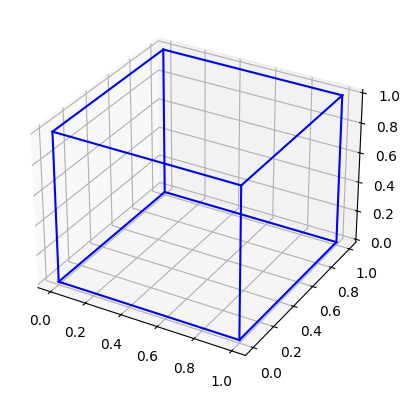

In [3]:
# LAB-9
# Construct a cube and draw it using matplotlib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_cube():
    return np.array([
        [0,0,0,1],[1,0,0,1],[1,1,0,1],[0,1,0,1],
        [0,0,1,1],[1,0,1,1],[1,1,1,1],[0,1,1,1]
    ]).T

def plot_cube(ax, pts, style):
    edges = [(0,1),(1,2),(2,3),(3,0),
             (4,5),(5,6),(6,7),(7,4),
             (0,4),(1,5),(2,6),(3,7)]
    for i,j in edges:
        ax.plot([pts[0,i], pts[0,j]],
                [pts[1,i], pts[1,j]],
                [pts[2,i], pts[2,j]], style)

cube = make_cube()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_cube(ax, cube, 'b-')
plt.show()


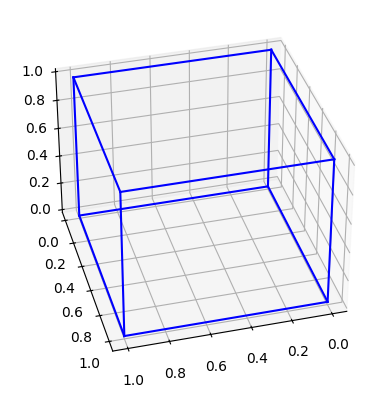

In [6]:
# LAB-9
# Try different viewing angles using ax.view_init() and observe the projection

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_cube():
    return np.array([
        [0,0,0,1],[1,0,0,1],[1,1,0,1],[0,1,0,1],
        [0,0,1,1],[1,0,1,1],[1,1,1,1],[0,1,1,1]
    ]).T

def plot_cube(ax, pts, style):
    edges = [(0,1),(1,2),(2,3),(3,0),
             (4,5),(5,6),(6,7),(7,4),
             (0,4),(1,5),(2,6),(3,7)]
    for i,j in edges:
        ax.plot([pts[0,i], pts[0,j]],
                [pts[1,i], pts[1,j]],
                [pts[2,i], pts[2,j]], style)

cube = make_cube()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_cube(ax, cube, 'b-')

# changed angles slightly for variation
ax.view_init(elev=35, azim=75)

plt.show()


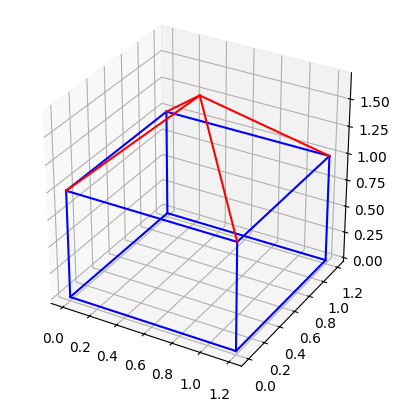

In [7]:
# LAB-9
# Create a simple 3D house model (cube plus pyramid roof) and apply transformations

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_house(ax):
    # slightly modified base size
    cube = np.array([
        [0,0,0],[1.2,0,0],[1.2,1.2,0],[0,1.2,0],
        [0,0,1],[1.2,0,1],[1.2,1.2,1],[0,1.2,1]
    ])

    edges = [(0,1),(1,2),(2,3),(3,0),
             (4,5),(5,6),(6,7),(7,4),
             (0,4),(1,5),(2,6),(3,7)]

    for i,j in edges:
        ax.plot([cube[i,0], cube[j,0]],
                [cube[i,1], cube[j,1]],
                [cube[i,2], cube[j,2]], 'b-')

    # slightly different roof peak
    peak = np.array([0.6, 0.6, 1.7])

    for i in range(4,8):
        ax.plot([cube[i,0], peak[0]],
                [cube[i,1], peak[1]],
                [cube[i,2], peak[2]], 'r-')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_house(ax)

ax.set_box_aspect([1,1,1])
plt.show()


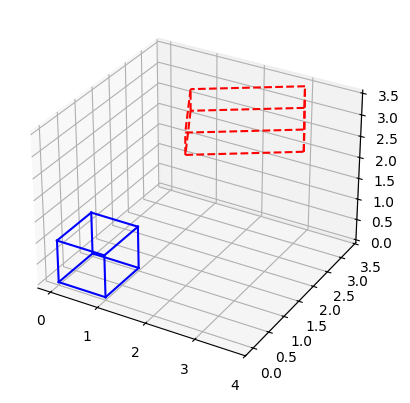

In [4]:
# LAB-9
# Apply scaling, rotation and translation, and display both original and transformed cubes

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_cube():
    return np.array([
        [0,0,0,1],[1,0,0,1],[1,1,0,1],[0,1,0,1],
        [0,0,1,1],[1,0,1,1],[1,1,1,1],[0,1,1,1]
    ]).T

def plot_cube(ax, pts, style):
    edges = [(0,1),(1,2),(2,3),(3,0),
             (4,5),(5,6),(6,7),(7,4),
             (0,4),(1,5),(2,6),(3,7)]
    for i,j in edges:
        ax.plot([pts[0,i], pts[0,j]],
                [pts[1,i], pts[1,j]],
                [pts[2,i], pts[2,j]], style)

cube = make_cube()

S = np.array([[2,0,0,0],
              [0,1.5,0,0],
              [0,0,0.5,0],
              [0,0,0,1]])

theta = np.pi/6
Rz = np.array([[np.cos(theta),-np.sin(theta),0,0],
               [np.sin(theta), np.cos(theta),0,0],
               [0,0,1,0],
               [0,0,0,1]])

T = np.array([[1,0,0,2],
              [0,1,0,1],
              [0,0,1,3],
              [0,0,0,1]])

M = T @ Rz @ S
cube_t = M @ cube

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_cube(ax, cube, 'b-')
plot_cube(ax, cube_t, 'r--')
plt.show()


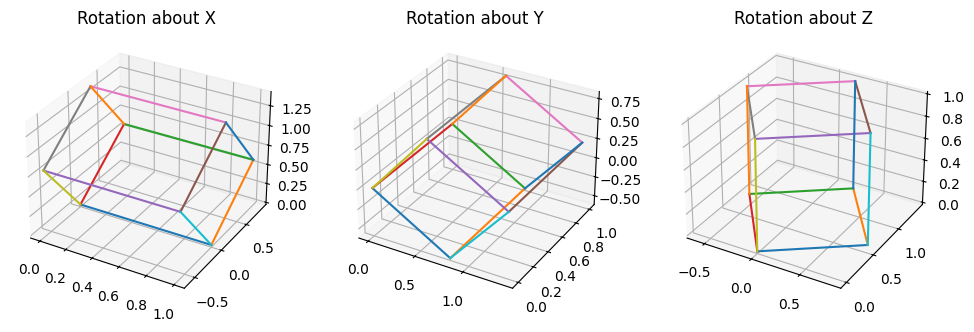

In [5]:
# LAB-9
# Implement rotations about the X-axis and Y-axis and compare their effects with rotation about the Z-axis

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_cube():
    return np.array([
        [0,0,0,1],[1,0,0,1],[1,1,0,1],[0,1,0,1],
        [0,0,1,1],[1,0,1,1],[1,1,1,1],[0,1,1,1]
    ]).T

def plot_cube(ax, pts, title):
    edges = [(0,1),(1,2),(2,3),(3,0),
             (4,5),(5,6),(6,7),(7,4),
             (0,4),(1,5),(2,6),(3,7)]
    for i,j in edges:
        ax.plot([pts[0,i], pts[0,j]],
                [pts[1,i], pts[1,j]],
                [pts[2,i], pts[2,j]])
    ax.set_title(title)

def Rx(t):
    return np.array([[1,0,0,0],
                     [0,np.cos(t),-np.sin(t),0],
                     [0,np.sin(t), np.cos(t),0],
                     [0,0,0,1]])

def Ry(t):
    return np.array([[ np.cos(t),0,np.sin(t),0],
                     [0,1,0,0],
                     [-np.sin(t),0,np.cos(t),0],
                     [0,0,0,1]])

def Rz(t):
    return np.array([[np.cos(t),-np.sin(t),0,0],
                     [np.sin(t), np.cos(t),0,0],
                     [0,0,1,0],
                     [0,0,0,1]])

cube = make_cube()

theta = np.pi/5   # slightly different rotation angle

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
plot_cube(ax1, Rx(theta) @ cube, "Rotation about X")

ax2 = fig.add_subplot(132, projection='3d')
plot_cube(ax2, Ry(theta) @ cube, "Rotation about Y")

ax3 = fig.add_subplot(133, projection='3d')
plot_cube(ax3, Rz(theta) @ cube, "Rotation about Z")

plt.show()
